In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as skim
import itertools as it
from midiutil import MIDIFile

In [34]:
!pip install midiutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54567 sha256=f88fb0e6470486d972bc1201e98385ef4e78ab136290ec8353f881913f6bb05e
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built midiutil


In [2]:
df= pd.read_csv("lunar_Crater_Ages.csv")
df.head()

,names,longitude,latitude,diameter,age
0,Copernicus,339.92969,9.63280,96.7,797
1,Tycho,348.71469,-43.25890,85.7,85
2,King,120.49220,4.93750,76.2,992
3,Jackson,196.68950,22.04000,71.4,147
4,Ohm,246.27397,18.28491,64.3,291


In [7]:
skim.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 111    │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0       ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ longitude      │   0 │      0 │   167.4 │   100.6 │    4.527 │   80.55 │  162.4 │  241.7 │  359.7 │ ▇▆▇▇▅▅ │  │
│ │ latitude       │   0 │      0 │   4.418 │   36.93 │   -73.45 │  -19.86 │  8.117 │  27.27 │  75.43 │ ▂▃▅▇▃▃ │  │
│ │ diameter       │   0 │      0 │   18.96 │    15.6 │       10 │    11.4 │   13.2 │  18.05 │   96.7 │   ▇    │  │
│ │ age            │   0 │      0 │   349.9 │   276.3 │        4 │   138.5 │    290 │    503 │   1324 │ ▇▅▃▁▁  │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴──────────┴─────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA     ┃ NA %         ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ names                    │     40 │        36.04 │                          1.1 │                      117 │  │
│ └──────────────────────────┴────────┴──────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

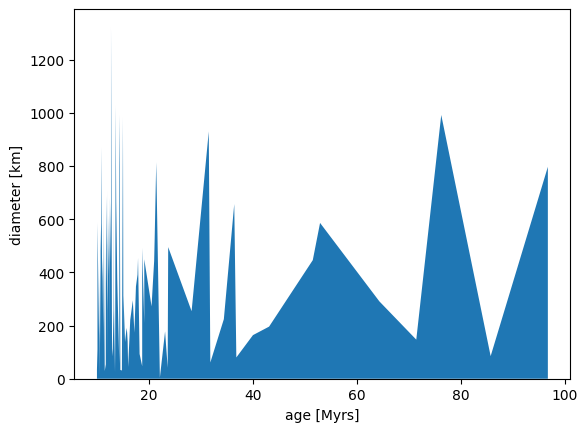

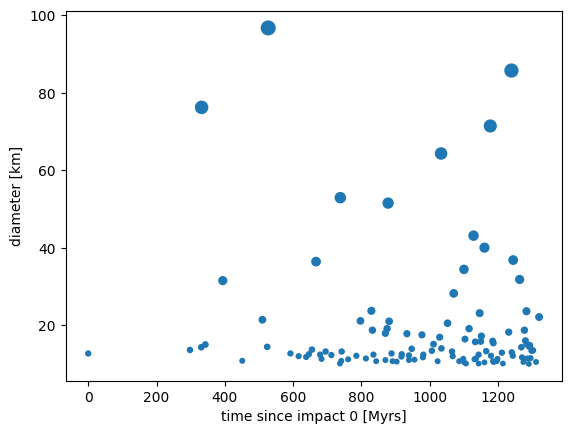

In [14]:
ages = df['age'].values
diameters = df['diameter'].values

plt.stackplot(diameters, ages)
plt.xlabel('age [Myrs]')
plt.ylabel('diameter [km]')
plt.show()

#time from oldest crater (first impact) in data
times_myrs = max(ages) - ages

plt.scatter(times_myrs, diameters, s=diameters)
plt.xlabel('time since impact 0 [Myrs]')
plt.ylabel('diameter [km]')
plt.show()

In [20]:
#now to map the features
def map_v(value,min_value, max_value, min_result, max_result):
    return min_result + (value- min_value) /(max_value - min_value)*(max_result- min_result)

In [16]:
myrs_pb= 20 #number of Myrs for each beat of music
re_time= times_myrs/myrs_pb #rescale time from Myrs to beats
duration_beats = max(re_time)
print('Duration:', duration_beats,'beats')

Duration: 66.0 beats


In [18]:
min_diameter = min(diameters)
max_diameter = max(diameters)

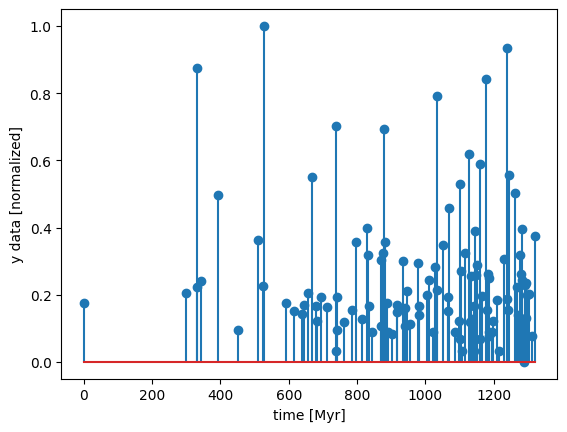

In [25]:
y_data = map_v(diameters, min_diameter, max_diameter, 0, 1)
y_scale= 0.5
y_data = y_data**y_scale

plt.stem(times_myrs, y_data)
plt.xlabel('time [Myr]')
plt.ylabel('y data [normalized]')
plt.show()

In [27]:
MIDI_A4 = 69
def str2midi(note_string):
    data = note_string.strip().lower()
    name2delta = {"c": -9, "d": -7, "e": -5, "f": -4, "g": -2, "a": 0, "b": 2}
    accident2delta = {"b": -1, "#": 1, "x": 2}
    accidents = list(it.takewhile(lambda el: el in accident2delta, data[1:]))
    octave_delta = int(data[len(accidents) + 1:]) - 4
    return (MIDI_A4 +
          name2delta[data[0]] + # Name
          sum(accident2delta[ac] for ac in accidents) + # Accident
          12 * octave_delta # Octave
         )

In [28]:
note_names = ['C2','D2','E2','F2','G2','A2','B2',
             'C3','D3','E3','F3','G3','A3','B3',
             'C4','D4','E4','F4','G4','A4','B4',
             'C5','D5','E5','F5','G5','A5','B5']

note_names = ['C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4',
             'C5','D5','E5','G5','A5']

note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']

note_midis = [str2midi(n) for n in note_names]

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')

Resolution: 23 notes


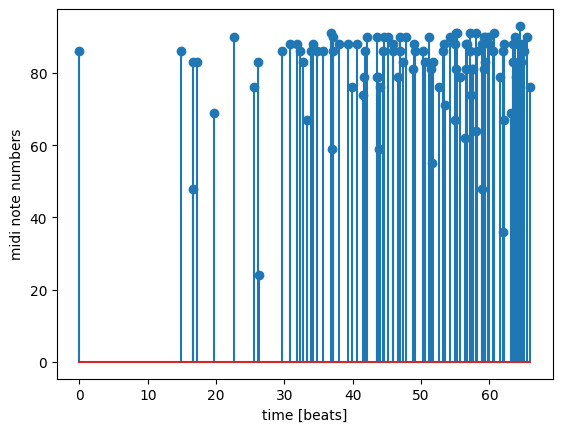

In [31]:
midi_data = []
for i in range(111):
    note_index = round(map_v(y_data[i], 0, 1, n_notes-1, 0))

    midi_data.append(note_midis[note_index])

plt.stem(re_time, midi_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

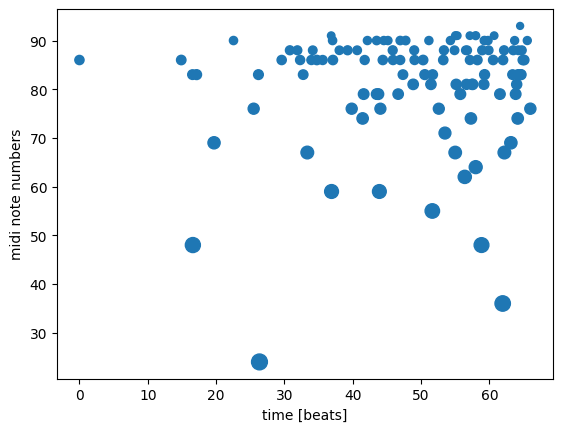

In [32]:
vel_min,vel_max = 25,130

vel_data = []
for i in range(111):
    note_velocity = round(map_v(y_data[i], 0, 1, vel_min, vel_max))

    vel_data.append(note_velocity)

plt.scatter(re_time, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [36]:
my_midi_file = MIDIFile(1)
my_midi_file.addTempo(track=0, time=0, tempo=60)

for i in range(111):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=re_time[i], duration=2, volume=vel_data[i])

with open('lunar_crater_ages'+ '.mid', "wb") as f:
    my_midi_file.writeFile(f)